In [1]:
def wcss(hdu, x, y):
    from astropy import wcs
    from astropy.io import fits
    CARD = [('NAXIS1',hdu['NAXIS1']),('NAXIS2',hdu['NAXIS2']),('BUNIT',hdu['BUNIT']),('CTYPE1',hdu['CTYPE1']),
             ('CTYPE2',hdu['CTYPE2']),('CRVAL1',hdu['CRVAL1']),('CRVAL2',hdu['CRVAL2']),('CRPIX1',hdu['CRPIX1']),
             ('CRPIX2',hdu['CRPIX2']),('CROTA2',hdu['CROTA2']),('CDELT1',hdu['CDELT1']),('CDELT2',hdu['CDELT2'])]
    hdr = fits.Header(cards= CARD)
    w = wcs.WCS(hdr)
    recx, recy = w.wcs_pix2world(x, y ,0)
    return [recx, recy]

In [2]:
def wcss2(hdu):
    from astropy import wcs
    from astropy.io import fits
    CARD = [('NAXIS1',hdu['NAXIS1']),('NAXIS2',hdu['NAXIS2']),('BUNIT',hdu['BUNIT']),('CTYPE1',hdu['CTYPE1']),
             ('CTYPE2',hdu['CTYPE2']),('CRVAL1',hdu['CRVAL1']),('CRVAL2',hdu['CRVAL2']),('CRPIX1',hdu['CRPIX1']),
             ('CRPIX2',hdu['CRPIX2']),('CROTA2',hdu['CROTA2']),('CDELT1',hdu['CDELT1']),('CDELT2',hdu['CDELT2'])]
    hdr = fits.Header(cards= CARD)
    w = wcs.WCS(hdr)
    x = hdu['NAXIS1']
    y = hdu['NAXIS2']
    recx, recy = w.wcs_pix2world([1, x, x, 1, 1],[1, 1, y, y, 1],1)
    return [recx, recy]

In [3]:
def wcss3(hdu, x, y):
    from astropy import wcs
    from astropy.io import fits
    CARD = [('NAXIS1',hdu['NAXIS1']),('NAXIS2',hdu['NAXIS2']),('BUNIT',hdu['BUNIT']),('CTYPE1',hdu['CTYPE1']),
             ('CTYPE2',hdu['CTYPE2']),('CRVAL1',hdu['CRVAL1']),('CRVAL2',hdu['CRVAL2']),('CRPIX1',hdu['CRPIX1']),
             ('CRPIX2',hdu['CRPIX2']),('CROTA2',hdu['CROTA2']),('CDELT1',hdu['CDELT1']),('CDELT2',hdu['CDELT2'])]
    hdr = fits.Header(cards= CARD)
    w = wcs.WCS(hdr)
    recx, recy = w.wcs_world2pix(x, y ,0)
    return [recx, recy]

In [11]:
def Image_Plot(img_name, smin, smax):
    import os
    import numpy as np
    import aplpy
    from astropy import wcs
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from astropy.io import fits
    from astropy.table import Table

    for name in img_name:

        fig = plt.figure(figsize=[9,9])
        if(os.path.isfile('{0}.fits'.format(name))):
            img = aplpy.FITSFigure('{0}.fits'.format(name), figure=fig)
            img.add_scalebar(1/60,color='r')
            img.scalebar.set_label('$1\ arcmin$')
        else:
            print('No such file:{0}_{1}.fits'.format(nnaa,name.split('_')[1]))
            continue

        data = fits.open('{0}.fits'.format(name))[0].data
        data[np.isnan(data)] = 0
        data.sort()
        vmax = data[:,-1]
        vmax.sort()
        mask = vmax<3*vmax[:-10].mean()
        vv = vmax[mask].mean()
        print(vv)
        img.show_grayscale(stretch='power', vmin=smin, vmax=smax, invert=True)
    return

/usr/local/lib/python3.6/site-packages/aplpy/wcs_util.py:515: UserWarning: Pixels are not square, using an average pixel scale
  warnings.warn("Pixels are not square, using an average pixel scale")


10000.048689138577


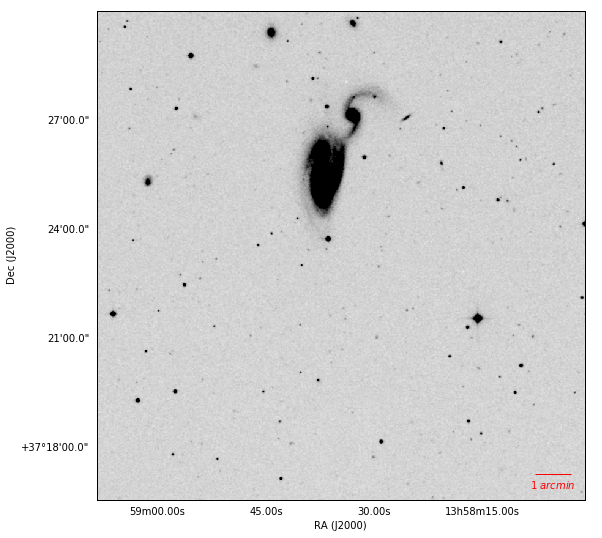

In [25]:
img_name = ['NGC5395_null']

Image_Plot(img_name, 0, 10000)

In [1]:
def Image_Plot(img_name, pn):
    import numpy as np
    import matplotlib.pyplot as plt

    for name in img_name:
        im = plt.imread(name)
        implot = plt.imshow(im)
        xx = im.shape
        pp = 1.009*2*pn/(xx[0]+xx[1])
        ps = int(60/pp)+1
        x = np.arange(0.8*xx[0],0.8*xx[0]+ps,1)
        y = np.ones(ps)*(xx[0]+xx[1])*0.45
        plt.plot(x, y, c='r')
        plt.text(x[0], np.mean(y)+25, '$1\ arcmin$', color='r', fontsize=8)
        plt.show()
    return

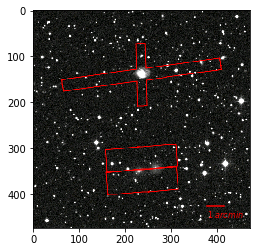

In [3]:
Image_Plot(['MCG+02-20-003.png'], 745)

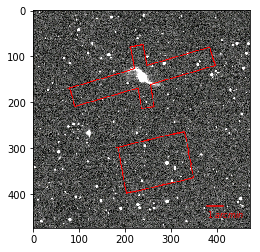

In [4]:
Image_Plot(['NGC2623.png'], 810)